In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("../Data/spam.csv", encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
df_no_nan = df.dropna(axis=1)
df_no_nan.columns = ["class", "content"]
df_no_nan.head()

,class,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='class', ylabel='count'>

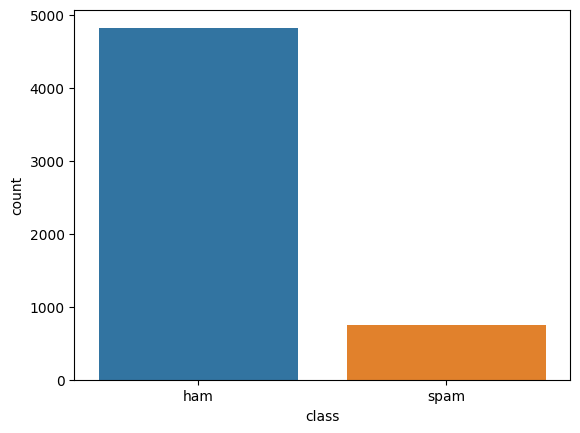

In [11]:
sns.countplot(data = df_no_nan, x = "class")

In [22]:
df_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   class    5572 non-null   object
 1   content  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [16]:
df = pd.get_dummies(df_no_nan, columns=["class"], drop_first=True)
X, y = df["content"], df["class_spam"]

## TF-IDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tfidf_vectorizer.get_stop_words() # meaningless words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [19]:
X_tfidf = tfidf_vectorizer.fit_transform(X)
X_tfidf # sparse matrix since so many words
# 5572 documents, 8404 unique words (43478 total words)

<5572x8404 sparse matrix of type '<class 'numpy.float64'>'
	with 43478 stored elements in Compressed Sparse Row format>

In [23]:
# importance?
X_tfidf.min(), X_tfidf.max()

(0.0, 1.0)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape

((3733, 8404), (1839, 8404))

<Axes: xlabel='class_spam', ylabel='count'>

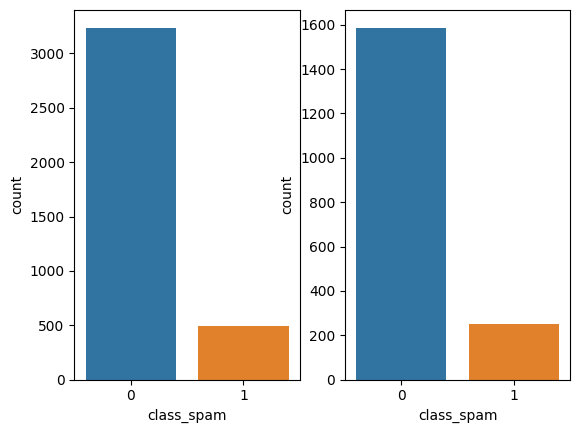

In [36]:
fig, ax = plt.subplots(1,2)
sns.countplot(x=y_train, ax = ax[0])
sns.countplot(x=y_test, ax = ax[1])

## Naive bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["Ham", "Spam"]).plot()

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1587
           1       1.00      0.75      0.86       252

    accuracy                           0.97      1839
   macro avg       0.98      0.88      0.92      1839
weighted avg       0.97      0.97      0.96      1839



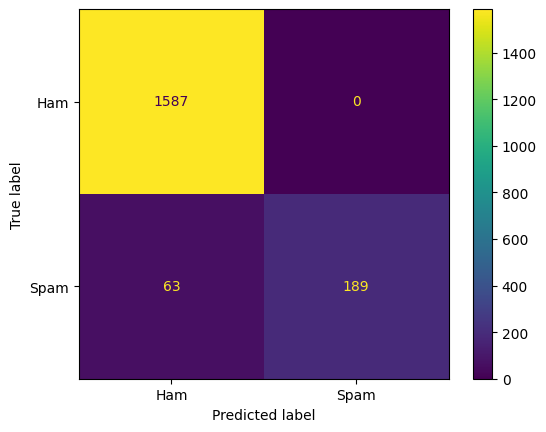

In [42]:
naive_bayes = dict(
    multinomial= MultinomialNB(),
    bernoulli= BernoulliNB(),
    complement= ComplementNB()
)
evaluate_model(naive_bayes["multinomial"])

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1587
           1       0.98      0.81      0.89       252

    accuracy                           0.97      1839
   macro avg       0.97      0.91      0.94      1839
weighted avg       0.97      0.97      0.97      1839



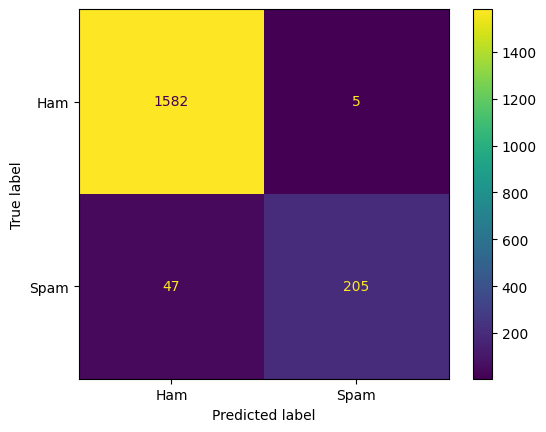

In [43]:
evaluate_model(naive_bayes["bernoulli"])

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1587
           1       0.66      0.94      0.78       252

    accuracy                           0.93      1839
   macro avg       0.83      0.93      0.87      1839
weighted avg       0.95      0.93      0.93      1839



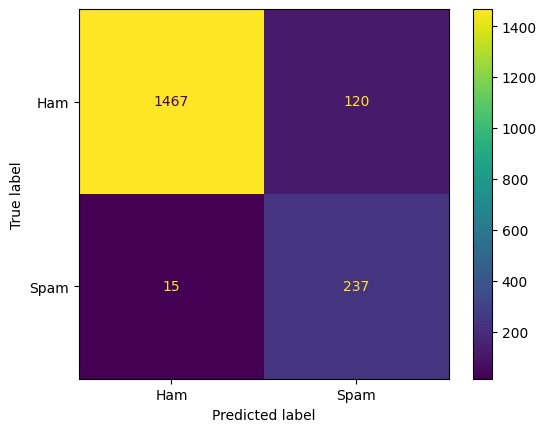

In [44]:
evaluate_model(naive_bayes["complement"])

## Some other models

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       0.97      0.85      0.91       252

    accuracy                           0.98      1839
   macro avg       0.97      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839



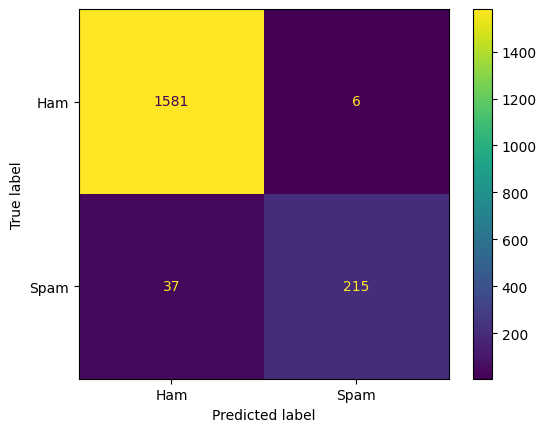

In [45]:
from sklearn.svm import LinearSVC

evaluate_model(LinearSVC())

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       0.99      0.85      0.91       252

    accuracy                           0.98      1839
   macro avg       0.98      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839



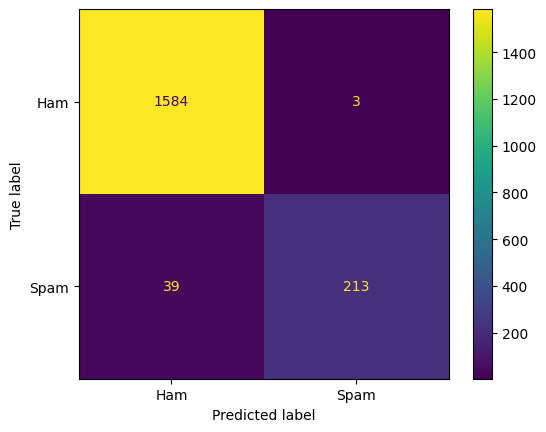

In [46]:
from sklearn.ensemble import RandomForestClassifier

evaluate_model(RandomForestClassifier())

## Combine different models

- majority vote
- class with most votes wins (hard voting)
- class with highest probability wins (soft voting)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       1.00      0.86      0.92       252

    accuracy                           0.98      1839
   macro avg       0.99      0.93      0.96      1839
weighted avg       0.98      0.98      0.98      1839



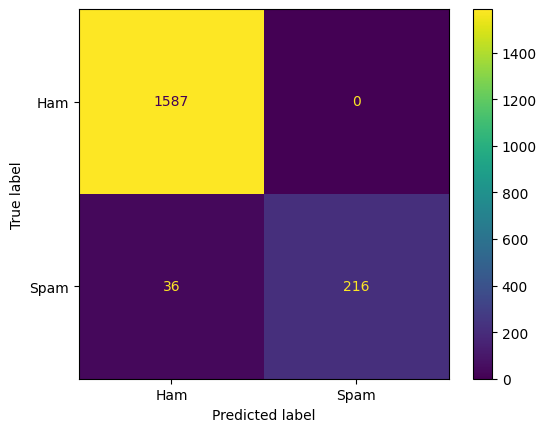

In [47]:
from sklearn.ensemble import VotingClassifier

vote_clf = VotingClassifier(
    [
        ("random_forest", RandomForestClassifier()),
        ("svc", LinearSVC()),
        ("naive_complement", ComplementNB()),
        ("naiva_multinomial", MultinomialNB()),
        ("naive_benoulli", BernoulliNB()),
    ],
    voting="hard",
)

evaluate_model(vote_clf)

## Testing a model

- assume we choose vote_clf

In [58]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("tfidf", TfidfVectorizer(stop_words="english")), ("vote", vote_clf)])

# fits on all data
pipe.fit(X,y)
pipe.predict(["win btc"])

array([1], dtype=uint8)